<a href="https://colab.research.google.com/github/ahamedistiaque/audi_used_car_analysis/blob/main/audi_used_car_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_context("talk")
sns.set_style("darkgrid")

In [4]:
path='/content/drive/MyDrive/Colab Notebooks/Data Processing for Machine Learning With Python/audi.csv'

In [5]:
df=pd.read_csv(path)
df.head(5)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


### Meaning of each column
1.   model :Audi Car Model
2.   Price	: Car Price
3.   transmission	: Total transmission
4.   mileage :Total miles travelled
5.   fuelType	: Type of fuel runs the car
6.   mpg	: Runs car Miles per gallon	
7.   engineSize	: volume of the cylinders in engine
8.   Year	: Car  Making year


In [6]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 10668
Number of columns 8


In [7]:
# check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


In [44]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [8]:
# Missing values in the dataset
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

In [9]:
# Data statistics
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


In [10]:
print("AUDI CAR MODEL :",df.model.unique())
print("AUDI Total  CAR MODEL :",len(df.model.unique()))

AUDI CAR MODEL : [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
AUDI Total  CAR MODEL : 26


In [11]:
df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [12]:
df.model.value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

###Data Aggregation


In [13]:
df_agg_model = df.groupby(['model'])['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


###Data preprocessing before visualization


#####Based on model, transmission, and fuelType,
A. What are the top 5 selling car models/transmission/fuelType in the dataset?

B. What's the average selling price of the top 5 selling car models/transmission/fuelType?

C. What's the total sale of the top 5 selling car models/transmission/fuelType?

In [14]:
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

df_agg_model['sum'] = df_agg_model['sum']/1000000

# Rounding for  two decimal points
df_agg_model = df_agg_model.round(2)

# Removing the count column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


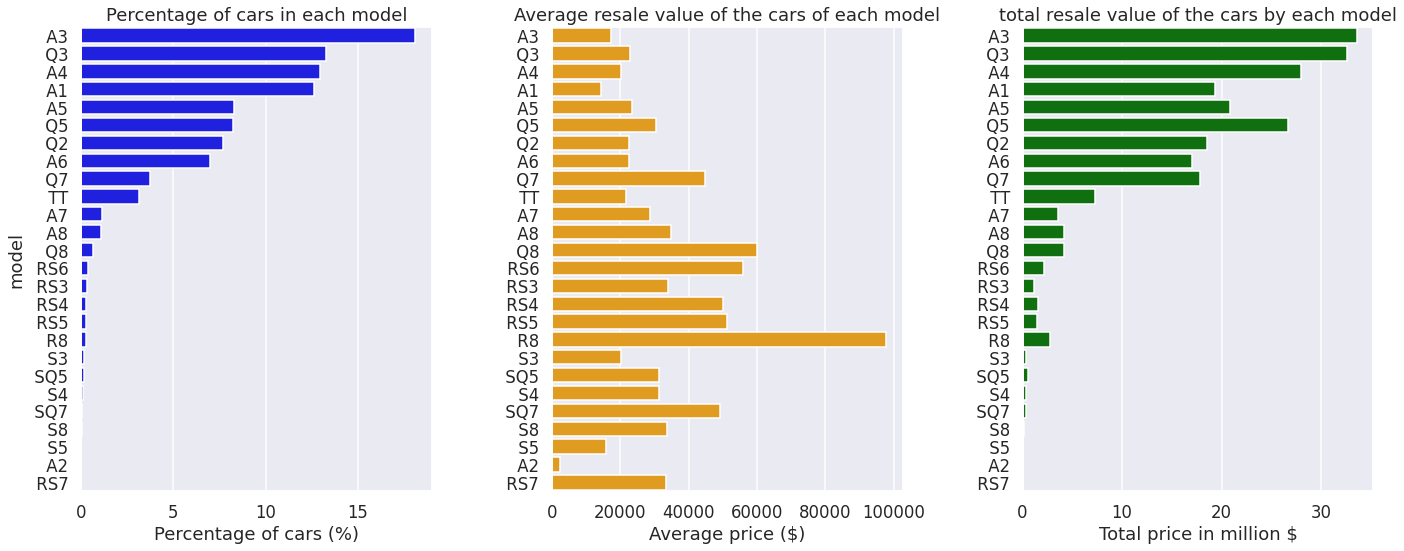

In [15]:
# Creating bar plot based on Model type
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

#.suptitle("Barplot of the AUDI used car")
plt.tight_layout()
plt.show()

In [16]:
# Creating bar plot based on Transmission type
df_agg_transmission = df.groupby(['transmission'])['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [17]:
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# Rounding for  two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# Removing the count column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


In [18]:
df_agg_model.index

Index([' A3', ' Q3', ' A4', ' A1', ' A5', ' Q5', ' Q2', ' A6', ' Q7', ' TT',
       ' A7', ' A8', ' Q8', ' RS6', ' RS3', ' RS4', ' RS5', ' R8', ' S3',
       ' SQ5', ' S4', ' SQ7', ' S8', ' S5', ' A2', ' RS7'],
      dtype='object', name='model')

In [19]:
def rotate():
  plt.xticks(rotation=90)
rotate

<function __main__.rotate>

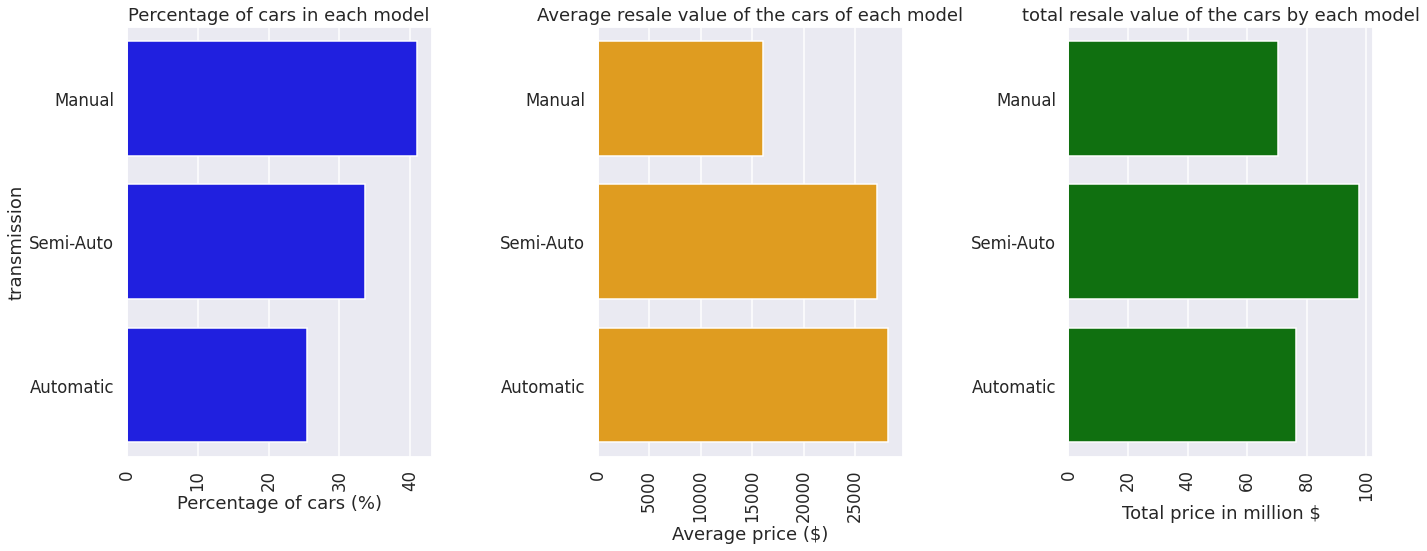

In [20]:
# Creating bar plot based on Transmission type
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xticks(rotation=90)
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xticks(rotation=90)
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xticks(rotation=90)
plt.xlabel("Total price in million $")
plt.ylabel("")

#.suptitle("Barplot of the AUDI used car")
plt.tight_layout()
plt.show()

In [21]:
# Creating bar plot based on fuel type
df_agg_fuelType = df.groupby(['fuelType'])['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


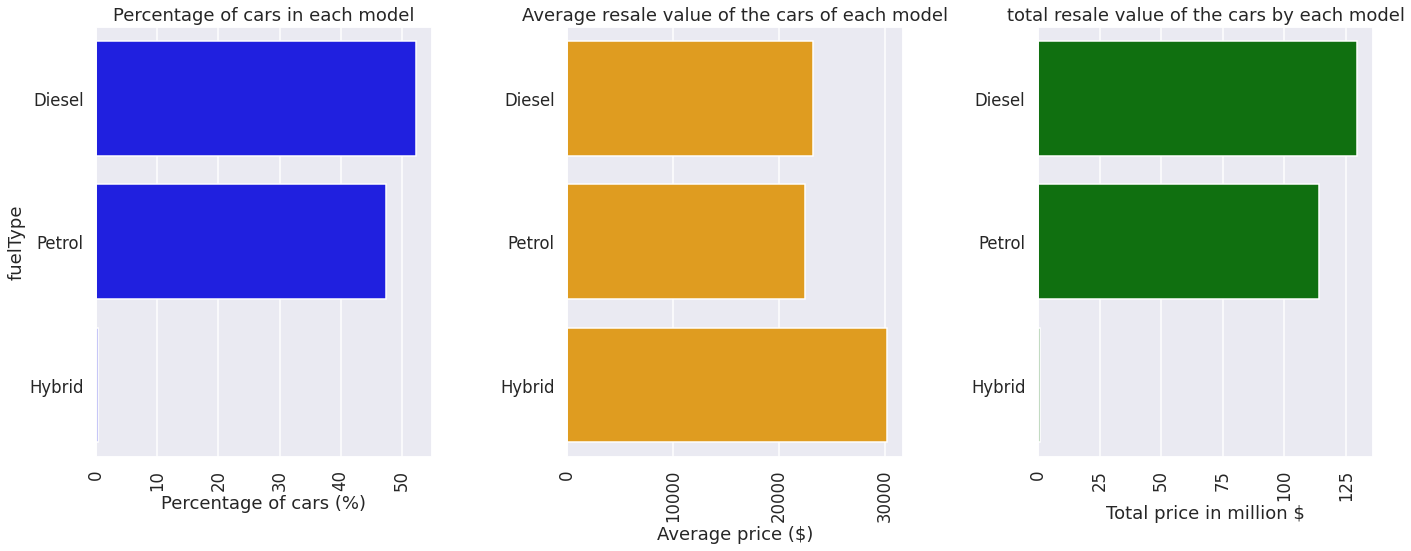

In [22]:
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# Rounding for  two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# Removing the count column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())


# Creating bar plot based on Transmission type
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.xticks(rotation=90)
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xticks(rotation=90)
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xticks(rotation=90)
plt.xlabel("Total price in million $")
plt.ylabel("")

#.suptitle("Barplot of the AUDI used car")
plt.tight_layout()
plt.show()


### **Data train for ML **

In [36]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [37]:
features = ['year', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (10668, 3)
Shape of y =  (10668, 1)


### Split train and test set


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 3) (2134, 3) (8534, 1) (2134, 1)


### **Applied Linear Regression Model**

In [39]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [40]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 6537.60803003]
 [24835.2384761 ]
 [29552.93488251]
 ...
 [14912.49399673]
 [24835.2384761 ]
 [14319.69557011]]


In [43]:
print(y_test,y_train)


       price
10442   9990
2907   22382
7388   28990
3016   30777
7890   14950
...      ...
8606   31450
8977   12900
3673   16750
1034   21996
6867    9547

[2134 rows x 1 columns]       price
5398  20630
5860  13495
906   29888
8065  11299
6520  19946
...     ...
5734  47450
5191  13490
5390  23766
860   20990
7270  21990

[8534 rows x 1 columns]


### **Find Prediction Error**


In [42]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

MAE =  3659.5404239203694
MSE =  34116315.623960055
RMSE =  5840.917361507527
r_squared =  0.7742577335950759
